# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [1]:
import pandas as pd
import numpy as np

#Data visualisation libraries 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Challenge 1

#### Open the ` Employee.csv` file and name your dataset `employee`

In [2]:
employee = pd.read_csv("../data/employee.csv")
employee

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### What's the mean salary by department. 
##### Tip : There are 2 ways to do it - one way is with and the other way is without pivot tables. Do it both ways. 


In [3]:
employee.groupby(["Department"]).mean()

,Years,Salary
Department,,
HR,4.666667,45.00
IT,4.500000,48.75
Sales,2.500000,55.00


In [4]:
pd.pivot_table(employee, 
               index=["Department"], 
               aggfunc=np.mean)

,Salary,Years
Department,,
HR,45.00,4.666667
IT,48.75,4.500000
Sales,55.00,2.500000


#### We want now to group the data by more than one column. Use Pandas pivot table function to select the mean salary by department and title

In [5]:
pd.pivot_table(employee, 
               index=["Department", "Title"], 
               aggfunc=np.mean)

Salary  Years
Department Title                   
HR         VP           70.0    8.0
           analyst      32.5    3.0
IT         VP           70.0    8.0
           analyst      32.5    1.5
           associate    60.0    7.0
Sales      associate    55.0    2.5

#### We want to display the number of years of work experience and the salary for each Title. Add Years as a column in your pivot table
*Hint: Use Pandas doc(see References in README.md) to explore the pivot_table() arguments*

In [6]:
pd.pivot_table(employee, 
               index=["Title", "Years"], 
               aggfunc=np.mean)

Salary
Title     Years        
VP        8          70
analyst   1          35
          2          30
          4          35
associate 2          55
          3          55
          7          60

#### We want to know the information about the mean salary and number of employees in each department and for each job title

In [7]:
salary_mean_by_department = pd.pivot_table(employee, 
                            values=["Salary", "Name"], 
                            index=["Department", "Title"], 
                            aggfunc={"Salary": np.mean, "Name": len})

#Rename 'Name' column
salary_mean_by_department.rename(columns={"Name": "Employees"})

Employees  Salary
Department Title                       
HR         VP                 1    70.0
           analyst            2    32.5
IT         VP                 1    70.0
           analyst            2    32.5
           associate          1    60.0
Sales      associate          2    55.0

#### We want to know for each department and for each job title the Salary's median,minimum,maximum and standard deviation. Comment your results

In [8]:
salary_stats = pd.pivot_table(employee, 
                                values=["Salary"], 
                                index=["Department", "Title"], 
                                aggfunc={"Salary": [min, max, np.mean, np.std]})

salary_stats
#The standard deviation cannot be calculated in series with a single value

Salary                      
                        max  mean   min       std
Department Title                                 
HR         VP          70.0  70.0  70.0       NaN
           analyst     35.0  32.5  30.0  3.535534
IT         VP          70.0  70.0  70.0       NaN
           analyst     35.0  32.5  30.0  3.535534
           associate   60.0  60.0  60.0       NaN
Sales      associate   55.0  55.0  55.0  0.000000

#### Based on your comments, fill the missing values with an appropriate value

In [9]:
#It should not be replaced by zero, as valid information from 'Sales-associate' wouldn't be differenced from that

#As long as there is no dispersion, it can stay 'NaN' or be removed
salary_stats.fillna("")

Salary                     
                        max  mean   min      std
Department Title                                
HR         VP          70.0  70.0  70.0         
           analyst     35.0  32.5  30.0  3.53553
IT         VP          70.0  70.0  70.0         
           analyst     35.0  32.5  30.0  3.53553
           associate   60.0  60.0  60.0         
Sales      associate   55.0  55.0  55.0        0

#### The stake holders want to know for each department the number of employees and how much money is spend on salaries. Could you provide that information? 

In [10]:
total_salary_by_department = pd.pivot_table(employee, 
                            values=["Salary", "Name"], 
                            index=["Department"], 
                            aggfunc={"Salary": sum, "Name": len})

#Rename columns
total_salary_by_department.columns = ["Employees", "Salaries"]

total_salary_by_department

,Employees,Salaries
Department,,
HR,3,135
IT,4,195
Sales,2,110


#### For each Department and Title, we want to know the the total years of work experience and the mean salary

In [11]:
pd.pivot_table(employee, 
                values=["Years", "Salary"], 
                index=["Department", "Title"], 
                aggfunc={"Years": sum, "Salary": np.mean})

Salary  Years
Department Title                   
HR         VP           70.0      8
           analyst      32.5      6
IT         VP           70.0      8
           analyst      32.5      3
           associate    60.0      7
Sales      associate    55.0      5

#### Bonus

#### We now want to compute the mean salary after removing the maxima for each Department. Create the appropriate pivot table

#### * Hint: Write a custom function*

In [14]:
employees_by_department = pd.pivot_table(employee, 
                            values=["Salary"], 
                            index=["Department", "Name"])

employees_by_department

Salary
Department Name          
HR         Ana         70
           David       30
           Sonia       35
IT         Carlos      70
           Jose        35
           Maria       30
           Pedro       60
Sales      Eva         55
           Samuel      55

In [ ]:
#Stuck here!

#max_by_department = employees_by_department.groupby("Department").agg(["max"]).reset_index()
#max_by_department

# Challenge 2

#### Open the ` Fitbit.csv` file and name your dataset `fitbit`

In [15]:
fitbit = pd.read_csv("../data/fitbit.csv")
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
0,08-05-2015,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417
1,09-05-2015,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491
2,10-05-2015,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436
3,11-05-2015,2673,6756,5.02,8,749.000,190,23,4,9620,311,31,21,350
4,12-05-2015,2495,502,3.73,1,876.000,171,0,0,7360,407,65,44,491


#### Explore you dataset in terms of data types and descriptive statistics
#### *Hint: Use Pandas functions from previous lectures*

In [16]:
fitbit.dtypes

Date                       object
Calorie burned              int64
Steps                       int64
Distance                  float64
Floors                      int64
Minutes Sedentary         float64
Minutes Lightly Active      int64
Minutes Fairly Active       int64
Minutes Very Active         int64
Activity Calories           int64
MinutesOfSleep              int64
MinutesOfBeingAwake         int64
NumberOfAwakings            int64
LengthOfRestInMinutes       int64
dtype: object

In [17]:
fitbit.describe()

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,2741.501362,10121.588556,8.549128,11.724796,563.934482,236.405995,26.163488,35.722071,2044.147139,290.479564,28.008174,16.196185,321.343324
std,916.307036,5594.836225,3.409881,10.337370,294.793145,86.531376,20.319456,31.006682,2041.267168,154.752328,18.541415,10.757622,170.786726
min,179.000000,0.000000,0.000000,0.000000,1.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2698.000000,6730.500000,6.155000,5.000000,520.000000,179.000000,8.000000,10.500000,1218.500000,224.000000,14.000000,7.000000,248.000000
50%,2974.000000,10413.000000,8.290000,11.000000,663.000000,226.000000,24.000000,29.000000,1553.000000,337.000000,29.000000,16.000000,370.000000
75%,3233.000000,13916.500000,10.560000,16.000000,756.500000,290.000000,41.500000,54.000000,1927.500000,400.500000,41.500000,24.000000,440.500000
max,4351.000000,26444.000000,20.450000,101.000000,998.000000,472.000000,101.000000,153.000000,9830.000000,553.000000,78.000000,45.000000,607.000000


#### You suspect that there must be a linear relationship between the Minutes Very Active and the Steps. Compute the correlation between these variables.

In [24]:
very_active_steps = fitbit[["Minutes Very Active", "Steps"]]
correlation = very_active_steps["Minutes Very Active"].corr(very_active_steps["Steps"])

print("Correlation between steps and 'minutes very active' is", correlation)

Correlation between steps and 'minutes very active' is 0.5714518481062608


#### Use matplotlib to visually plot Minutes Very active vs Steps. 

##### Hint : import matplotlib.pyplot as plt (See previous lessons)#####
- Use plt.scatter(x=df['col_name_1'], y=df['col_name_2'])

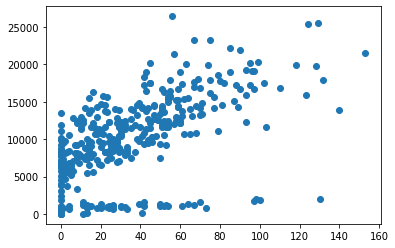

In [26]:
plt.scatter(x=very_active_steps["Minutes Very Active"], y=very_active_steps["Steps"])

#### What can you say about Minute Very Active and Steps? Write a comment below

In [ ]:
#Steps amount seems to correlate to minutes of high intensity exercise

#### We also suspect that there must be a linear relationship between the Minutes Sedentary and the Steps. Compute the correlation between these variables.

Correlation between steps and 'minutes sedentary' is 0.07690608062990091


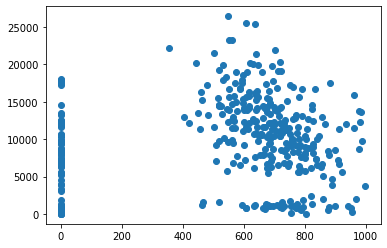

In [31]:
sedentary_steps = fitbit[["Minutes Sedentary", "Steps"]]
correlation = sedentary_steps["Minutes Sedentary"].corr(sedentary_steps["Steps"])

print("Correlation between steps and 'minutes sedentary' is", correlation)

#### Use matplotlib to visually plot Minutes Sedentary vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

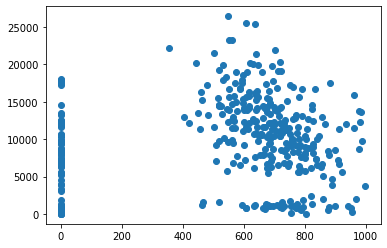

In [32]:
plt.scatter(x=sedentary_steps["Minutes Sedentary"], y=sedentary_steps["Steps"])

In [ ]:
#Steps amount seems to decrease when minutes of sedentary exercise increase
#It's quite rare that there are so many values with 0 minutes of sedentarism

#### We also suspect that there must be a linear relationship between the MinutesOfSleep and the Steps. Compute the correlation between these variables.

In [33]:
sleep_steps = fitbit[["MinutesOfSleep", "Steps"]]
correlation = sleep_steps["MinutesOfSleep"].corr(sleep_steps["Steps"])

print("Correlation between steps and sleep time is", correlation)

Correlation between steps and 'minutes sedentary' is 0.1309856595083638


#### Use matplotlib to visually plot MinutesOfSleep vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

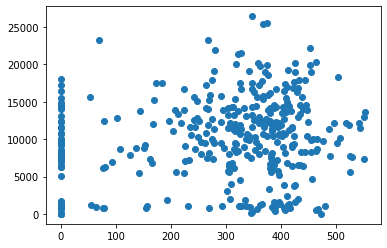

In [34]:
plt.scatter(x=sleep_steps["MinutesOfSleep"], y=sleep_steps["Steps"])

In [ ]:
#The representation is quite scattered if the values of x=0 are ignored. There isn't a clear correlation

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

In [44]:
fitbit_subset = fitbit[['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']]
fitbit_subset.head()

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
0,1934,905,0,1.355,0,384
1,3631,18925,4,611.000,60,454
2,3204,14228,1,602.000,77,387
3,2673,6756,8,749.000,4,311
4,2495,502,1,876.000,0,407


In [42]:
cor_fit = fitbit_subset.corr()
cor_fit

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000


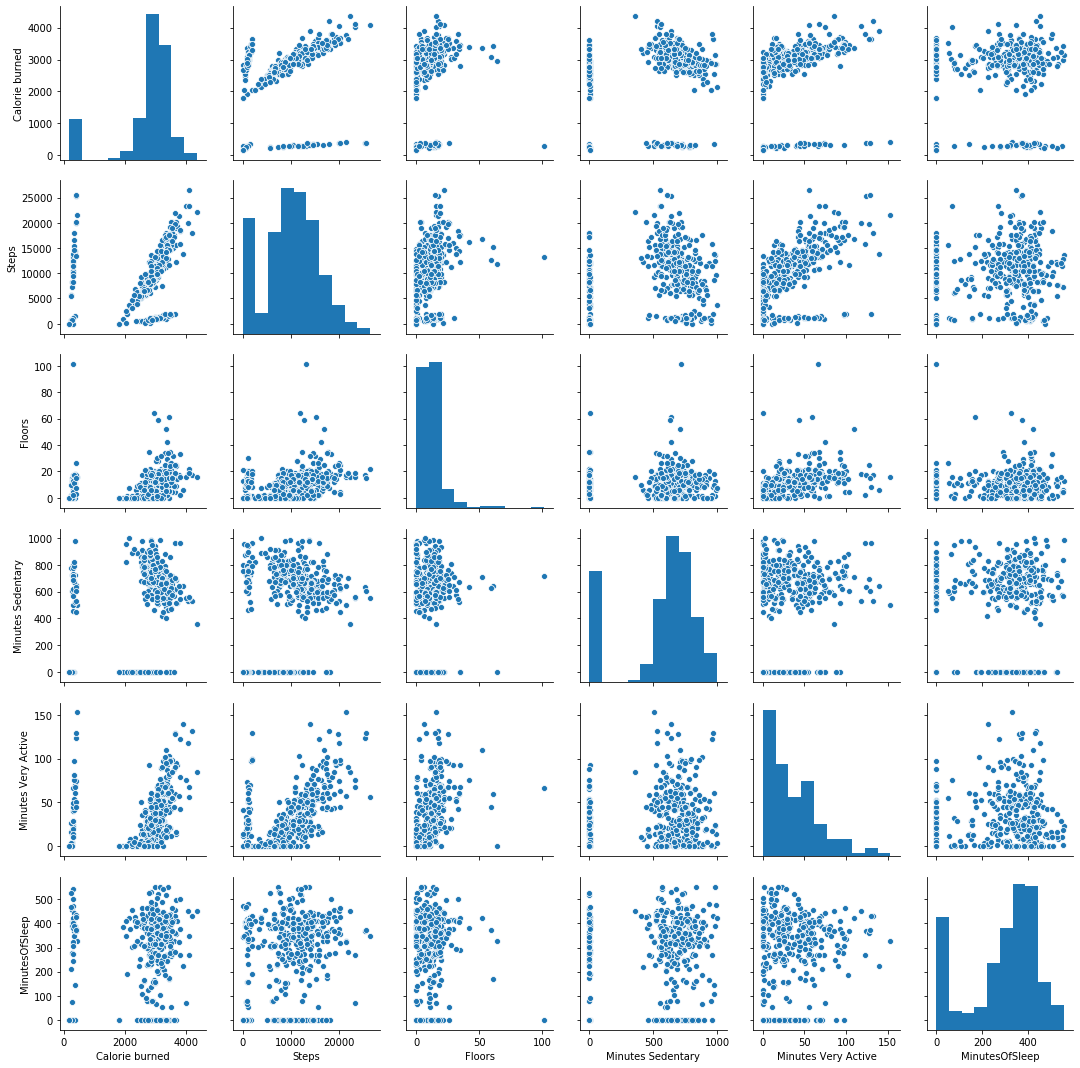

In [46]:
#Visualize all possible correlations with Seaborn
sns.pairplot(fitbit_subset)

#### Based on the result of the correlation matrix. What are the highly correlated features with the variable Steps?
*Hint: From the results above select the variable Steps and order your results in descending order (use Pandas sort_values function)*

In [ ]:
#The highest correlation is 'Minutes Very Active' and 'Steps' (0.571452)
#The second, 'Minutes Very Active' and 'Floors' (0.399503)

# Challenge 3

#### Open the `Time_Grades.csv` file and name your dataset `time_grades`

In [ ]:
# your answer here

In [ ]:
#Print time_grades

#### Show visually the frequency distribution of the time_grades dataset.

In [ ]:
# your answer here

#### Is there a correaltion between study time and Grade? Use both Pearson and Spearman correlation and comment your results.

In [ ]:
# your answer here-Pearson 

In [ ]:
## your answer here-Spearman

#### Use matplotlib to visually plot Study time vs Grade. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

In [ ]:
# your answer here

In [ ]:
#your comment here

#### Could you explain the difference between Pearson and Spearman correlation? (see References in README.md) 

In [ ]:
#your comment here